In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading data
observations=pd.read_csv('observations.csv')
species=pd.read_csv('species_info.csv')

### Data Wrangling ###

#### Dataframe Observations ###

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
# rename column header which is identific with df name
observations.rename(columns={'observations': 'obs_num'}, inplace=True)
observations.head()

,scientific_name,park_name,obs_num
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   obs_num          23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
# number of rows
observations.shape

(23296, 3)

In [7]:
# data types
observations.dtypes

scientific_name    object
park_name          object
obs_num             int64
dtype: object

In [8]:
# number of unique values in each column
observations.nunique()

scientific_name    5541
park_name             4
obs_num             304
dtype: int64

In [9]:
observations.describe(include = 'all')

,scientific_name,park_name,obs_num
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


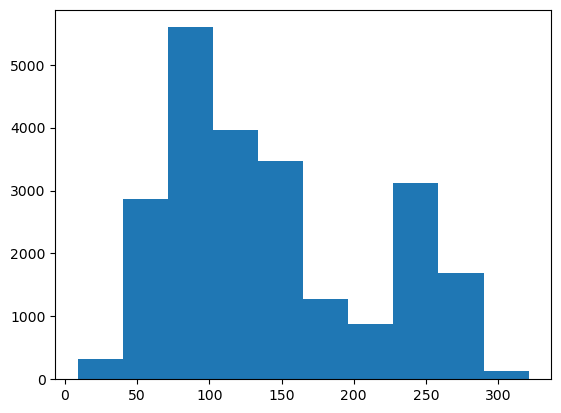

<Figure size 640x480 with 0 Axes>

In [10]:
plt.hist(observations.obs_num)
plt.show()
plt.clf()

In [11]:
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [12]:
# finding missing values
observations.isna().sum()

scientific_name    0
park_name          0
obs_num            0
dtype: int64

In [13]:
# finding missing values in column with datatype int64
observations['obs_num']=observations['obs_num'].where(observations['obs_num']!=0, np.nan)
observations.isna().sum()

scientific_name    0
park_name          0
obs_num            0
dtype: int64

In [14]:
# finding duplicates
observations.duplicated().value_counts()

False    23281
True        15
dtype: int64

##### Description of observations dataframe #####
In the dataframe observations there are 23296 records in 3 columns: 
- scientific_name: Latin name of the plant/animal
- park_name: locating of the observations
- obs_num: number of observations  

The first two columns' datatype is objective, they are names, the third column (which is a count) has intreger values, so there is no need to change datatype.  
In the dataframe, there is 5541 different creatures listed in 4 national parks (Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park). It might be useful to cut the end-string of the par_name (' National Park) because it will be shorter. 
The minimum of observations is 9, the maximum value is 321. In the distribution, 2 peaks can be seen on the histoplot. The data is right-skewed.
Probably, there is no missing value in the dataframe. 
There is 15 duplicated observations.

#### Dataframe Species ###

In [15]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [16]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [17]:
# number of rows
species.shape

(5824, 4)

In [18]:
# data types
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [19]:
species.describe(include = 'all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [20]:
# number of unique values in each column
species.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [21]:
# values of category
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [22]:
# unique values in column coservation_status
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [23]:
# finding missing values
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [24]:
# finding duplicates
species.duplicated().value_counts()

False    5824
dtype: int64

In [25]:
species[species.common_names.isin(['American Beaver, Beaver', 'American Beaver'])]

,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",NaN
3050,Mammal,Castor canadensis,American Beaver,NaN


##### Description of species dataframe #####

In the dataframe, there is 5824 records in 4 column:
- category: taxonomy of species. There are 7 category: 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'
- scientific_name: Latin name of species
- common_names: common used names of species
- conservation_status: in the column there are 4 values, and a big percentof them is NaN. The other values of the variable (Species of Concern', 'Endangered', 'Threatened', 'In Recovery') mean that the animal/plant is in kind of danger. Maybe the data is missing structurally, and means that the conservation status is 'not endangered' 

The datatype for all columns is object. It can be maybe usful to change the datatype of columns conversation_status and category into categorical datatype to scale the values.  
Maybe there are some duplicated records in the dataframe like American Beaver ~ Beaver.

### Data Cleaning and Organizing ###

#### Tasks ####
- [x] characterizing missingness in column conservation_status (df species)
- [x] fill data in df species 
- [x] change conservation_status dtype (df species)
- [x] change category dtype (df species)
- [x] exploring and dropping duplications in df observations  
- [x] cut ' National Park' - observations.park_name

In [26]:
# characterizing missingness in column conservation_status
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [27]:
# count of categories not in danger
pd.crosstab(species['category'], species['conservation_status'].isna(),rownames=['category'], colnames=['conservation is na'])

conservation is na,False,True
category,,
Amphibian,7,73
Bird,79,442
Fish,11,116
Mammal,38,176
Nonvascular Plant,5,328
Reptile,5,74
Vascular Plant,46,4424


In [28]:
# filling data
species['conservation_status'].fillna(value = 'Not Endangered', inplace = True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered


In [29]:
# exploring duplications
duplicates = observations[observations.duplicated(keep=False)].sort_values(by = ['scientific_name'])
print(duplicates)

              scientific_name                            park_name  obs_num
513             Arctium minus               Yosemite National Park      162
10674           Arctium minus               Yosemite National Park      162
4527   Botrychium virginianum            Yellowstone National Park      232
20294  Botrychium virginianum            Yellowstone National Park      232
19392       Cichorium intybus            Yellowstone National Park      266
14142       Cichorium intybus            Yellowstone National Park      266
7263   Echinochloa crus-galli  Great Smoky Mountains National Park       62
1454   Echinochloa crus-galli  Great Smoky Mountains National Park       62
1020     Eleocharis palustris  Great Smoky Mountains National Park       62
12381    Eleocharis palustris  Great Smoky Mountains National Park       62
1032      Hesperis matronalis                  Bryce National Park      124
13372     Hesperis matronalis                  Bryce National Park      124
4178     Mon

In [30]:
# drop duplicates
observations = observations.drop_duplicates()
duplicates = observations[observations.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [scientific_name, park_name, obs_num]
Index: []


In [31]:
# cut 'National Park' - observations
observations['park_name']=observations['park_name'].str.strip(' National Park')
observations.head()

,scientific_name,park_name,obs_num
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [32]:
# changing conservation_status dtype (df species)
# species['conservation_status']=pd.Categorical(species['conservation_status'], ['Not Endangered', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'], ordered=True)

In [33]:
# changing category dtype (df species)
species['category']=pd.Categorical(species['category'], ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], ordered=True)

In [34]:
# duplicates is species
species[species.duplicated(subset=['scientific_name', 'conservation_status'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Not Endangered
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",Not Endangered
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Not Endangered
3025,Mammal,Lutra canadensis,River Otter,Not Endangered
3028,Mammal,Mustela vison,"American Mink, Mink",Not Endangered
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",Not Endangered
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",Not Endangered
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",Not Endangered
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",Not Endangered


In [35]:
# drop duplicates
species.drop_duplicates(subset=['scientific_name', 'conservation_status'], inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             5543 non-null   category
 1   scientific_name      5543 non-null   object  
 2   common_names         5543 non-null   object  
 3   conservation_status  5543 non-null   object  
dtypes: category(1), object(3)
memory usage: 179.0+ KB


In [36]:
species[species.common_names.isin(['American Beaver, Beaver', 'American Beaver'])]

,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",Not Endangered


### Purposes of Analysis ###

#### Questions ####
-  **are there any patterns or themes to the types of species that become endangered?**
- relation of category and endangered status
- relation of endangered status and park name

At first, I have to analyze the data of dataframe species bcause there are basic informations about conservation status. It could be interesting to see the relation between categories and conservation status:
- how representative are the grades among conservation status
- what are the proportions of categories to each other, which is the most representative category in this data,
- how is the proportion of species in somehow endangered status to all species (by category)
- is there a connection between categories and being in somehow endangered

#### Tasks ####
- [x] create a df for species in somehow danger
- [x] create a bar chart about the number each species in danger grouped by category
- [ ] chi-square statistic for categories and conservation_status
- [x] merge the 2 dfs
- [x] create a chart about the number each species in danger grouped by park name

### Analysing of Data Species ####

#### Inspecting Conservation Status ####


In [37]:
# create a df for species in somehow danger
species_in_danger = species[species['conservation_status']!='Not Endangered']
# species_in_danger.rename(columns={'index': 'original_index'}, inplace=True)
species_in_danger.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [38]:
species_in_danger.conservation_status.value_counts()

Species of Concern    151
Endangered             15
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [39]:
len(species_in_danger.conservation_status)

180

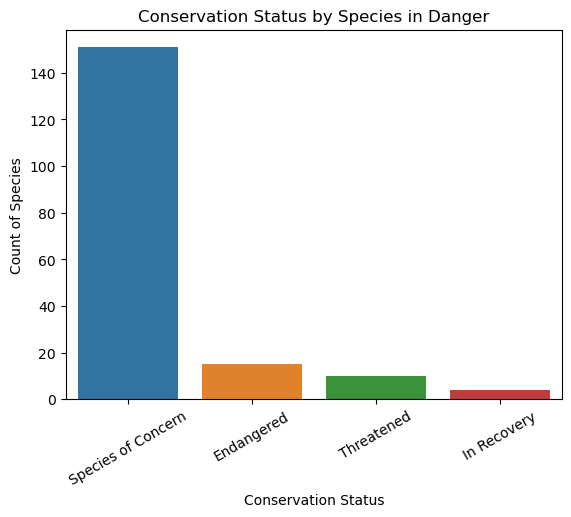

<Figure size 640x480 with 0 Axes>

In [77]:
sns.countplot(x='conservation_status', data=species_in_danger)
plt.xticks(rotation=30)
plt.title('Conservation Status by Species in Danger')
plt.xlabel('Conservation Status')
plt.ylabel('Count of Species')
plt.savefig('cons_status_in_danger.png', bbox_inches='tight')
plt.show()
plt.clf()

The most species of endangered status is by concerned grade, there are 151 species in this category of 180. This is 83 %!
There are 15 species which are really "endangered", it is only 8.3 % of all species in danger. 10 species are threatened and 4 in recovery, these grades have really small numbers.
It seems to be  effective to concentrate the grades of "speices of concern" and "endangered".

#### Inspecting Category ####

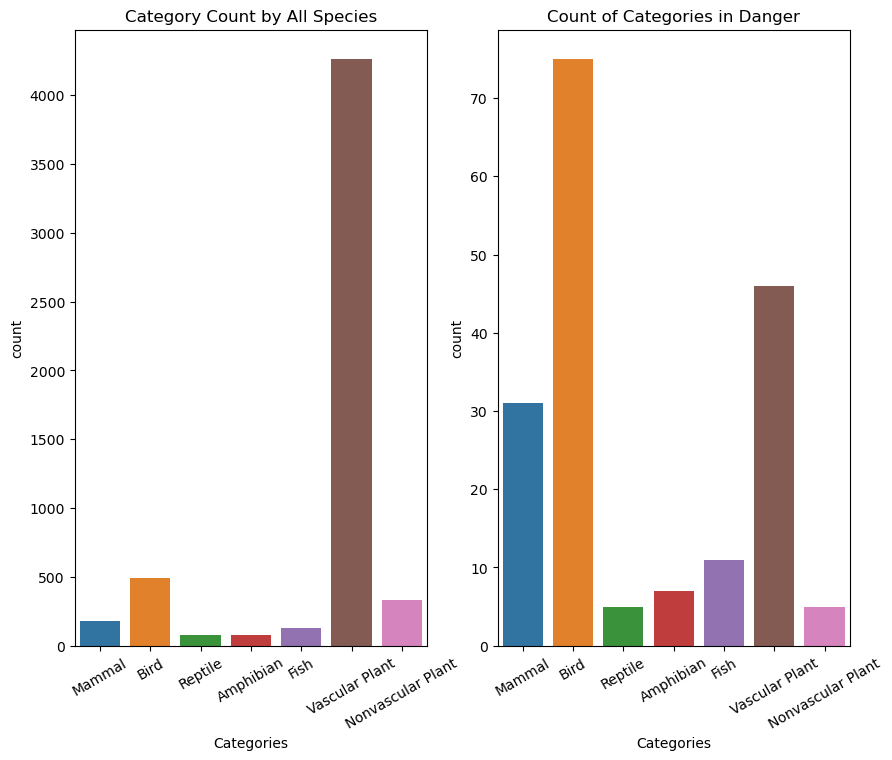

<Figure size 640x480 with 0 Axes>

In [65]:
# category count all species vs species in danger 
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(x='category', data=species)
plt.xticks(rotation=30)
plt.title('Category Count by All Species')
plt.xlabel('Categories')

plt.subplot(1,2,2)
sns.countplot(x='category', data=species_in_danger)
plt.xticks(rotation=30)
plt.title('Count of Categories in Danger')
plt.xlabel('Categories')
plt.savefig('category_counts.png')

plt.show()
plt.clf()

In [42]:
species.category.value_counts()

Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                177
Fish                  126
Amphibian              79
Reptile                78
Name: category, dtype: int64

In [43]:
species_in_danger.category.value_counts()

Bird                 75
Vascular Plant       46
Mammal               31
Fish                 11
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: category, dtype: int64

Among species in danger, the largest number belongs to the birds (79), followed by vascular plants (46) and mammal (38). In all data birds are on second place, vascular plants are the most represented category. Nonvascular plants are at the third position in all data, among endangered species, they have the least count.  
The most representative categories are mammals, birds and vascular plants.
If we look at the proportion of the grades of "somehow in danger", we can see, that in endangered status, the most are mammal (7 of 16, 44%) and birds (4 of 16, 25%). In status "species of concern" we can find 72 birds, 43 vascular plants and 28 mammals - the other values are much smaller.  
Now, I want to investigate, how relate the percentage of species in danger to all species.

##### percentage of species in danger to all species by category #####

In [44]:
species.category.unique()

['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']
Categories (7, object): ['Mammal' < 'Bird' < 'Reptile' < 'Amphibian' < 'Fish' < 'Vascular Plant' < 'Nonvascular Plant']

In [45]:
# percent of species in danger in all data
d = {'category': ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], 
     'total_num': [177, 488, 78, 79, 126, 4262, 333], 
     'in_danger_num':[31, 75, 5, 7, 11, 46, 5]}
percent_in_danger = pd.DataFrame(data = d)
percent_in_danger['percent']=percent_in_danger['in_danger_num']/percent_in_danger['total_num']*100
print(percent_in_danger.sort_values('percent', ascending=False))


            category  total_num  in_danger_num    percent
0             Mammal        177             31  17.514124
1               Bird        488             75  15.368852
3          Amphibian         79              7   8.860759
4               Fish        126             11   8.730159
2            Reptile         78              5   6.410256
6  Nonvascular Plant        333              5   1.501502
5     Vascular Plant       4262             46   1.079305


<Figure size 1000x1000 with 0 Axes>

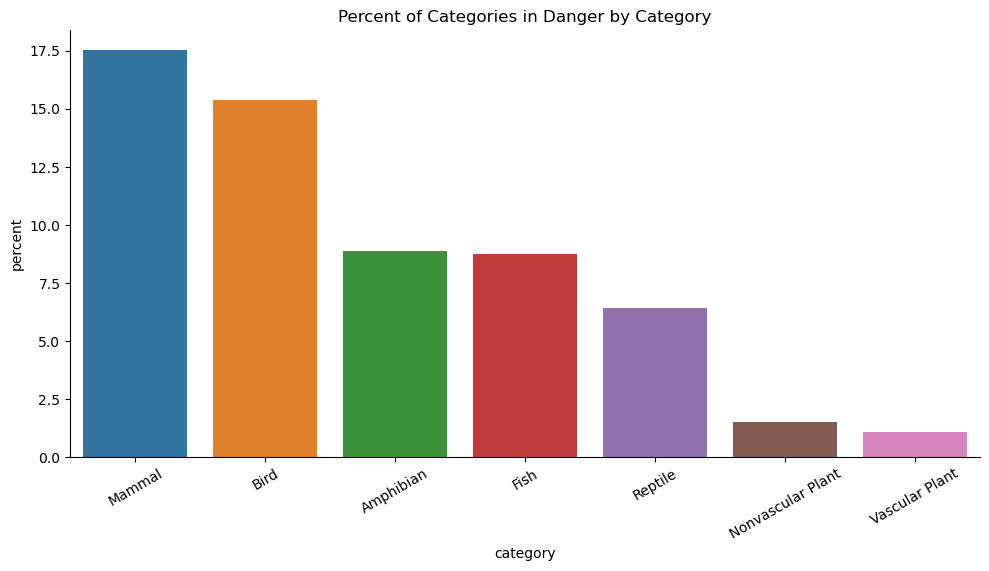

<Figure size 640x480 with 0 Axes>

In [75]:
# plotting percentage of endangered species by category
plt.figure(figsize=(10, 10))
sns.catplot(x = 'category', y = 'percent', 
            data = percent_in_danger, 
            kind = 'bar', 
            aspect =2,
            order =percent_in_danger.sort_values('percent', ascending=False).category)

plt.xticks(rotation=30)

plt.title('Percent of Categories in Danger by Category')
plt.savefig('percent_cat_in_danger.png', bbox_inches='tight')
plt.show()
plt.clf()

#### Relation between Category and Conservation Status ####

In [47]:
# conservation status and categories
cat_conservation=species_in_danger.groupby(['category', 'conservation_status']).agg({'scientific_name': 'count'})
cat_conservation_pivot = pd.pivot_table(
data=cat_conservation,
    values= 'scientific_name',
index='conservation_status',
columns='category',
aggfunc='sum')
cat_conservation_pivot

category,Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular Plant
conservation_status,,,,,,,
Endangered,6,4,0,1,3,1,0
In Recovery,1,3,0,0,0,0,0
Species of Concern,22,68,5,4,4,43,5
Threatened,2,0,0,2,4,2,0


If we inspect the percentage of species in danger to all species by category, we see that mammals have the largest percent (17.51%), followed by birds (15.36%). The third and 4th positioned categories (amphibians' and fishes) have about 9 % endangered species. Only 1 % of vascular plants is in danger. 
From that we can say, that maybe mammals and birds are the most endangered categories. However, most of them are "species of concern" (68 birds, 22 mammals). Really endangered are 6 mammals and 4 birds of 15 endangered species.  
I want to investigate the relation of the two variables category and conservaton status with chi-square tests.
From variable conservation status I want to test the values "in danger' and "not in danger", from category "mammal" and "bird", principally.

##### Chi-square Tests #####

In [48]:
# create bool column: in_danger (True if the animal/plant is somehow in danger)
species['in_danger']=species.conservation_status.apply(lambda x: False if x == 'Not Endangered' else True)
species.head(10)

,category,scientific_name,common_names,conservation_status,in_danger
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Not Endangered,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Not Endangered,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


In [49]:
# contingency tables: categories- in_danger in species
categories_in_danger_freq= pd.crosstab(species.category, species.in_danger)
categories_in_danger_freq

in_danger,False,True
category,,
Mammal,146,31
Bird,413,75
Reptile,73,5
Amphibian,72,7
Fish,115,11
Vascular Plant,4216,46
Nonvascular Plant,328,5


In [50]:
#proportions
categories_in_danger_prop = categories_in_danger_freq/len(species)*100
categories_in_danger_prop

in_danger,False,True
category,,
Mammal,2.633953,0.559264
Bird,7.450839,1.353058
Reptile,1.316976,0.090204
Amphibian,1.298936,0.126285
Fish,2.074689,0.198448
Vascular Plant,76.059895,0.829876
Nonvascular Plant,5.917373,0.090204


In [51]:
# marginals - in_danger
in_danger_marginals=categories_in_danger_prop.sum(axis=0)
in_danger_marginals

in_danger
False    96.752661
True      3.247339
dtype: float64

From the propotional contingency table we can see, that from all species, there are 3 % species in danger, 97 % not.  1% of all species are birds in danger, and 0.65% are mammals in danger.

In [52]:
# chi2 contingency for all category
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(categories_in_danger_freq)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[1.71252210e+02 5.74779001e+00]
 [4.72152986e+02 1.58470143e+01]
 [7.54670756e+01 2.53292441e+00]
 [7.64346022e+01 2.56539780e+00]
 [1.21908353e+02 4.09164712e+00]
 [4.12359841e+03 1.38401588e+02]
 [3.22186361e+02 1.08136388e+01]]
chi2 = 432.33404829592416
p-value = 3.107572119895922e-90


In [53]:
# comparing expected and observed values
# creating df for expected values
category=['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant']

expected_values=pd.DataFrame(expected, columns=['expected_false', 'expected_true'])
expected_values.insert(loc=0, column='category', value=category)
expected_values

# creating df for observed values
categories_in_danger_freq.columns=['observed_false', 'observed_true']
categories_in_danger_freq.reset_index(inplace=True)
categories_in_danger_freq

# merge dfs
observed_expected=pd.merge(
    left=categories_in_danger_freq, 
    right=expected_values,
    how='inner'
)
# difference between observed and expected values
observed_expected['difference']=observed_expected['expected_false']-observed_expected['observed_false']
observed_expected

,category,observed_false,observed_true,expected_false,expected_true,difference
0,Mammal,146,31,171.252210,5.747790,25.252210
1,Bird,413,75,472.152986,15.847014,59.152986
2,Reptile,73,5,75.467076,2.532924,2.467076
3,Amphibian,72,7,76.434602,2.565398,4.434602
4,Fish,115,11,121.908353,4.091647,6.908353
5,Vascular Plant,4216,46,4123.598412,138.401588,-92.401588
6,Nonvascular Plant,328,5,322.186361,10.813639,-5.813639


From the table above can be seen the observed values, the expected values which was calculated with the chi2_contingency method, and the differences between the observed and expected values. The largest difference can be observed by vascular plants (92.4), this can be caused by the low proportion of being in danger of vascular plants. The second and third largest differences are by birds (59.15) and mammals (25.25). The smallest difference is by category reptile (2.5).  
As next step, I will test mammal vs bird, mammal vs reptile and bird vs reptile to see whether I can see some association between the values. The significant treshold for the p-value is 0.05, for the chi2-value 4. 

##### Mammal vs Birds #####

In [54]:
# contingency table mammal_bird
contingency_mammal_bird=[[146, 31], [413, 75]]
chi2, pval, dof, expected = chi2_contingency(contingency_mammal_bird)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[148.78646617  28.21353383]
 [410.21353383  77.78646617]]
chi2 = 0.3003887977788037
p-value = 0.583638782116612


The p-value is 0.58 which is much larger than the genereal significance treshold 0.05, so there does not seem to be a relation between birds and mammals being in danger. The chi-square value with 0.3 is also smaller than the in general expected value for 2x2 tables (around 4).

##### Mammal vs Reptile #####

In [55]:
# contingency table mammal_reptile
contingency_mammal_reptile=[[146, 31], [73, 5]]
chi2, pval, dof, expected = chi2_contingency(contingency_mammal_reptile)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[152.01176471  24.98823529]
 [ 66.98823529  11.01176471]]
chi2 = 4.627936545853599
p-value = 0.03145537265429932


The p-value is 0.03 which is smaller than the genereal significance treshold 0.05, the chi-square value with 4.63 is also greater than the in general expected value for 2x2 tables (around 4). It seems to be a relation between mammal and reptile being in danger: mammal have significant greater probability of being in danger than reptile. 

##### Birds vs Reptile #####

In [56]:
# contingency table bird_reptile
contingency_bird_reptile=[[413, 75], [73, 5]]
chi2, pval, dof, expected = chi2_contingency(contingency_bird_reptile)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[419.02473498  68.97526502]
 [ 66.97526502  11.02473498]]
chi2 = 3.739654778685496
p-value = 0.053135422321542065


The p-value is in this case 0.053 which is the significance treshold. The chi2-value is 3.74 which is a little bit smaller than 4. The relation between birds and reptile being in danger is maybe significant, but the relation is weak.

### Inspecting All Data ###

In the next section I would like to inspect in wichich national park more endangered species occure. At first, I need to merge both datasets, than clean the merged dataset if needed.

In [57]:
# outer merge species and observations
all_data = pd.merge(left=species, right=observations, left_on='scientific_name', right_on='scientific_name', how='outer')
all_data.head(10)


,category,scientific_name,common_names,conservation_status,in_danger,park_name,obs_num
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Yosemite,117
4,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False,Yosemite,128
5,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False,Yellowstone,269
6,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False,Bryce,68
7,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False,Great Smoky Mountains,77
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered,False,Bryce,99
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered,False,Yosemite,124


In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23301 entries, 0 to 23300
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             23301 non-null  category
 1   scientific_name      23301 non-null  object  
 2   common_names         23301 non-null  object  
 3   conservation_status  23301 non-null  object  
 4   in_danger            23301 non-null  bool    
 5   park_name            23301 non-null  object  
 6   obs_num              23301 non-null  int64   
dtypes: bool(1), category(1), int64(1), object(4)
memory usage: 1.1+ MB


In [59]:
# looking for missing values
all_data.isna().value_counts()

category  scientific_name  common_names  conservation_status  in_danger  park_name  obs_num
False     False            False         False                False      False      False      23301
dtype: int64

In [60]:
all_data.isnull().value_counts()

category  scientific_name  common_names  conservation_status  in_danger  park_name  obs_num
False     False            False         False                False      False      False      23301
dtype: int64

In [61]:
# looking for duplications
all_data.duplicated().value_counts()

False    23301
dtype: int64

#### In Danger ####

In [78]:
# create a df for species in somehow danger
all_data_in_danger = all_data[all_data.conservation_status!='Not Endangered'].reset_index()
all_data_in_danger.head(20)

,index,category,scientific_name,common_names,conservation_status,in_danger,park_name,obs_num
0,40,Mammal,Canis latrans,Coyote,Species of Concern,True,Bryce,85
1,41,Mammal,Canis latrans,Coyote,Species of Concern,True,Yellowstone,206
2,42,Mammal,Canis latrans,Coyote,Species of Concern,True,Great Smoky Mountains,68
3,43,Mammal,Canis latrans,Coyote,Species of Concern,True,Yosemite,99
4,44,Mammal,Canis lupus,Gray Wolf,Endangered,True,Yosemite,35
5,45,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,27
6,46,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,29
7,47,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,74
8,48,Mammal,Canis lupus,Gray Wolf,Endangered,True,Great Smoky Mountains,15
9,49,Mammal,Canis lupus,Gray Wolf,Endangered,True,Yellowstone,60


In [80]:
all_data_in_danger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                780 non-null    int64   
 1   category             780 non-null    category
 2   scientific_name      780 non-null    object  
 3   common_names         780 non-null    object  
 4   conservation_status  780 non-null    object  
 5   in_danger            780 non-null    bool    
 6   park_name            780 non-null    object  
 7   obs_num              780 non-null    int64   
dtypes: bool(1), category(1), int64(2), object(4)
memory usage: 38.6+ KB


In the merged dataframe there are 25601 records, from which 880 records have a kind of endangered conservation status.

#### Inspecting Number of Observation ####

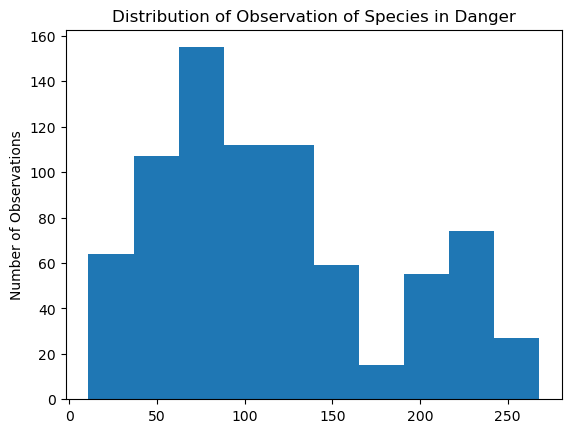

<Figure size 640x480 with 0 Axes>

In [161]:
plt.hist(all_data_in_danger.obs_num)
plt.title('Distribution of Observation of Species in Danger')
plt.ylabel('Number of Observations')
plt.savefig('dist_obs_num.png', bbox_inches='tight')
plt.show()
plt.clf()

The distribution is right-skewed, has two peaks, one between 50 and 100, the number of observations is 175, one at around 230, where the number of observations is around 80.

In [81]:
# observations in parks
obs_park = all_data_in_danger.groupby('park_name').obs_num.sum()
print(obs_park)

park_name
Bryce                    16393
Great Smoky Mountains    11336
Yellowstone              39365
Yosemite                 23729
Name: obs_num, dtype: int64


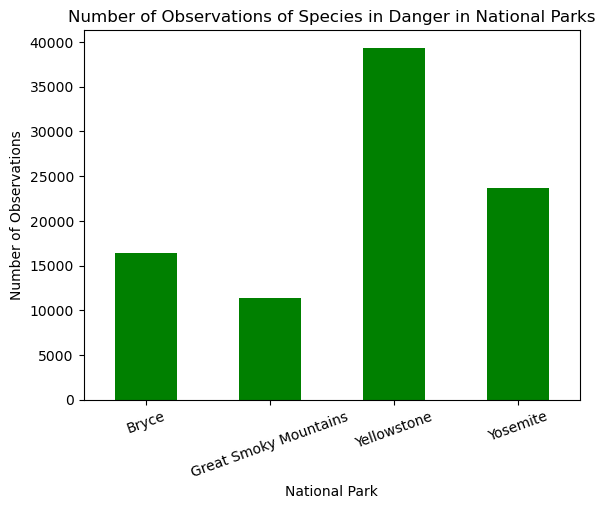

<Figure size 640x480 with 0 Axes>

In [159]:
obs_park.plot(kind='bar', color='green')
plt.title('Number of Observations of Species in Danger in National Parks')
plt.xticks(rotation=20)
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.savefig('obs_parks.png', bbox_inches='tight')
plt.show()
plt.clf()

The most observations was reported from Yellowstone National Park (39365). From the other parks come around the half of this observations or less than the half: 23729 from Yosemite National Park.    

##### Observations by Categories #####

In [83]:
# observation numbers of categories
obs_category = all_data_in_danger.groupby('category').obs_num.sum()
print(obs_category)

category
Mammal               17164
Bird                 38608
Reptile               2536
Amphibian             2752
Fish                  4209
Vascular Plant       22849
Nonvascular Plant     2705
Name: obs_num, dtype: int64


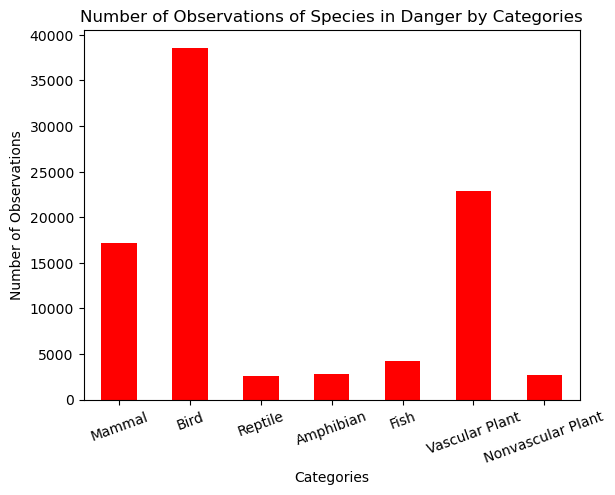

<Figure size 640x480 with 0 Axes>

In [84]:
obs_category.plot(kind='bar', color='red')
plt.title('Number of Observations of Species in Danger by Categories')
plt.xticks(rotation=20)
plt.xlabel('Categories')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

Among endangered species the most observation referred to birds, followed by mammals and vascular plants. The other categories had a lot less observations.

#### National Parks ####

In [85]:
all_data_in_danger.park_name.value_counts()

Bryce                    195
Yellowstone              195
Great Smoky Mountains    195
Yosemite                 195
Name: park_name, dtype: int64

In [86]:
# number of observations of species in danger in national parks by categories
categories_in_parks = all_data_in_danger.groupby(['park_name', 'category']).agg({'obs_num': 'sum'})

categories_in_parks_pivot= pd.pivot_table(
    data=categories_in_parks,
    values='obs_num',
    index='park_name',
    columns='category',
)
categories_in_parks_pivot

category,Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular Plant
park_name,,,,,,,
Bryce,3167,6926,387,498,731,4198,486
Great Smoky Mountains,2027,4741,365,333,547,2950,373
Yellowstone,7550,16788,1100,1167,1875,9716,1169
Yosemite,4420,10153,684,754,1056,5985,677


In [88]:
park_obs=all_data.groupby(['park_name', 'in_danger']).agg({'obs_num': 'sum'})
park_obs_pivot=pd.pivot_table(
data=park_obs,
columns='in_danger',
index='park_name',
values='obs_num')

park_obs_pivot.columns=['not_in_danger', 'in_danger']
park_obs_pivot.reset_index()
park_obs_pivot['percent']=park_obs_pivot['in_danger']/park_obs_pivot['not_in_danger']*100
park_obs_pivot.reset_index(inplace=True)
park_obs_pivot

,park_name,not_in_danger,in_danger,percent
0,Bryce,559802,16393,2.928357
1,Great Smoky Mountains,420201,11336,2.697757
2,Yellowstone,1403651,39365,2.804472
3,Yosemite,839480,23729,2.826631


The percent of observing of species in danger to those which are not in danger is the biggest in Bryce National Park (2.92 %). However, there is a small difference to the other parks (Yosemite National Park is the second with 2.83 %).  
As next step, I would like to focus on three grades of conservation status: all - in danger - endangered.

##### Observations of Species in (endangered/ in danger/not in danger) Status in Parks

In [160]:
# creating df for endangered obsevations
all_data_endangered=all_data[all_data['conservation_status']=='Endangered']
all_data_endangered.head()

,category,scientific_name,common_names,conservation_status,in_danger,park_name,obs_num
44,Mammal,Canis lupus,Gray Wolf,Endangered,True,Yosemite,35
45,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,27
46,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,29
47,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,74
48,Mammal,Canis lupus,Gray Wolf,Endangered,True,Great Smoky Mountains,15


In [92]:
all_obs_park=all_data.groupby('park_name').obs_num.sum()
all_obs_park.columns

park_name
Bryce                     576195
Great Smoky Mountains     431537
Yellowstone              1443016
Yosemite                  863209
Name: obs_num, dtype: int64

In [93]:
endangered_obs_park=all_data_endangered.groupby('park_name').obs_num.sum()
endangered_obs_park

park_name
Bryce                     489
Great Smoky Mountains     334
Yellowstone              1228
Yosemite                  747
Name: obs_num, dtype: int64

In [156]:
# percents of observation in different status
data=[all_obs_park, obs_park, endangered_obs_park]
perc_obs_park=pd.DataFrame(data=data)
perc_obs_park=perc_obs_park.transpose()
perc_obs_park.reset_index(inplace=True)
perc_obs_park.columns=['park_name','all', 'in_danger', 'endangered']
    
perc_obs_park['percent_all']=perc_obs_park['all']/perc_obs_park['all'].sum()*100
perc_obs_park['percent_in_danger']=perc_obs_park['in_danger']/perc_obs_park['in_danger'].sum()*100
perc_obs_park['percent_endangered']=perc_obs_park['endangered']/perc_obs_park['endangered'].sum()*100
perc_obs_park

,park_name,all,in_danger,endangered,percent_all,percent_in_danger,percent_endangered
0,Bryce,576195,16393,489,17.386918,18.049393,17.476769
1,Great Smoky Mountains,431537,11336,334,13.021804,12.481420,11.937098
2,Yellowstone,1443016,39365,1228,43.543595,43.342545,43.888492
3,Yosemite,863209,23729,747,26.047683,26.126642,26.697641


In [123]:
# create df for visualization of proportion of observation in different status
data=[all_obs_park, obs_park, endangered_obs_park]
diff_obs_park=pd.DataFrame(data=data)
diff_obs_park=diff_obs_park.transpose()
diff_obs_park.reset_index(inplace=True)
diff_obs_park.columns=['park_name','all', 'in_danger', 'endangered']
diff_obs_park['diff_all_in_danger']=(diff_obs_park['all']-diff_obs_park['in_danger'])/100

diff_obs_park['diff_in_danger_endangered']=(diff_obs_park['in_danger']-diff_obs_park['endangered'])
diff_obs_park

,park_name,all,in_danger,endangered,diff_all_in_danger,diff_in_danger_endangered
0,Bryce,576195,16393,489,5598.02,15904
1,Great Smoky Mountains,431537,11336,334,4202.01,11002
2,Yellowstone,1443016,39365,1228,14036.51,38137
3,Yosemite,863209,23729,747,8394.80,22982


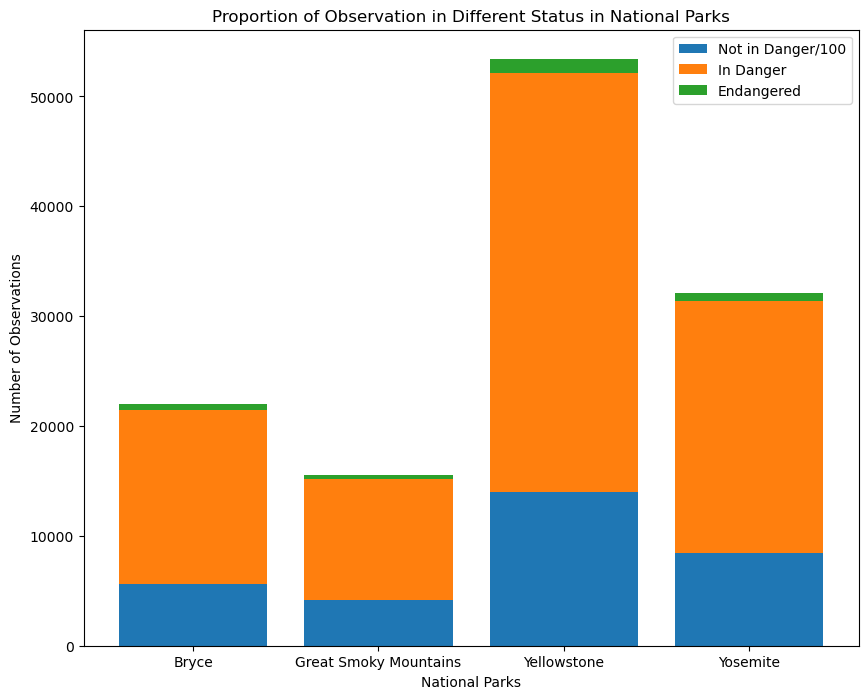

<Figure size 640x480 with 0 Axes>

In [158]:
# visualization of proportions of observations in parks by conservation status

given_bottom=np.add(diff_obs_park['diff_all_in_danger'], diff_obs_park['diff_in_danger_endangered'])
_,ax=plt.subplots(figsize=(10,8))
plt.bar(diff_obs_park['park_name'], diff_obs_park['diff_all_in_danger'])
plt.bar(diff_obs_park['park_name'], 
        diff_obs_park['diff_in_danger_endangered'], bottom=diff_obs_park['diff_all_in_danger'])
plt.bar(diff_obs_park['park_name'], diff_obs_park['endangered'], bottom=given_bottom)
ax.set_ylabel('Number of Observations')
ax.set_xlabel('National Parks')
plt.title('Proportion of Observation in Different Status in National Parks')
labels_legend=['Not in Danger/100', 'In Danger', 'Endangered']
ax.legend(labels=labels_legend)
plt.savefig('prop_obs_num_parks_status.png', bbox_inches='tight')
plt.show()
plt.clf()

The number of observations are the highest in Yellostone National Park, as among all observations (43.54%) as among species in danger (43.34%) and among endangered species (43.88%). The same situation can be observed in other national parks. On the vizualisation above I devided the number of all observations by 100 to show better the top of the bars where you can see the number of observation of endangered species.  
As the final step I will analyze the relation of the common names and the observationnumbers in the different national parks. 

###### Observations of Common Names in National Parks #####

In [95]:
all_data_endangered.groupby(['category','common_names'])['obs_num'].sum().sort_values(ascending=False)[:15]

category        common_names                                               
Mammal          Gray Wolf                                                      715
Fish            Duskytail Darter                                               166
Vascular Plant  Mountain Avens, Spreading Avens                                162
Mammal          Gray Myotis                                                    160
Bird            California Condor                                              156
Mammal          Carolina Northern Flying Squirrel, Northern Flying Squirrel    153
                Sierra Nevada Bighorn Sheep                                    153
Fish            June Sucker                                                    146
Bird            Red-Cockaded Woodpecker                                        146
Mammal          Indiana Bat, Indiana Or Social Myotis                          145
Amphibian       Sierra Nevada Yellow-Legged Frog                               144
Fish       

The most observed endangered animal is the Grey Wolf with 715 observations. This number is an outlier, the other observation numbers are between 131 and 166. Among the endangered species, there are mammals, birds, fishes, one amphibian and one vascular plant.

In [96]:
danger_spec_park=all_data_endangered.groupby(['park_name', 'common_names']).agg({'obs_num': 'sum'})

# danger_spec_park.columns=['park_name', 'common_name', 'obs_num']
danger_spec_park.reset_index(inplace=True)

danger_spec_park= pd.pivot_table(
data=danger_spec_park,
values='obs_num',
columns='park_name',
index='common_names')
danger_spec_park.reset_index(inplace=True)
danger_spec_park.columns=['common_name','Bryce', 'GSM', 'Yellowstone', 'Yosemite']
danger_spec_park['sum']=danger_spec_park['Bryce']+danger_spec_park['GSM']+danger_spec_park['Yellowstone']+danger_spec_park['Yosemite']
danger_spec_park.sort_values(by=['sum'], ascending=False)

,common_name,Bryce,GSM,Yellowstone,Yosemite,sum
5,Gray Wolf,130,59,330,196,715
3,Duskytail Darter,25,31,70,40,166
8,"Mountain Avens, Spreading Avens",25,27,63,47,162
4,Gray Myotis,27,26,68,39,160
1,California Condor,30,15,64,47,156
2,"Carolina Northern Flying Squirrel, Northern Fl...",29,21,67,36,153
11,Sierra Nevada Bighorn Sheep,22,25,67,39,153
7,June Sucker,23,23,65,35,146
10,Red-Cockaded Woodpecker,24,15,64,43,146
6,"Indiana Bat, Indiana Or Social Myotis",27,14,68,36,145


The observations of the Gray Wolf are in all National Parks high. The numbers are in Yellowstone National Park the highest, but proportionately they are the same for each record. It can not be observed any relations between endangered status and national parks.